In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv('./data/train_10pct.csv')
df.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.shape


(26059, 39)

In [9]:
df.mean().value_counts(normalize=True)

0.000153         0.064516
0.000000         0.032258
6261.106105      0.032258
0.007752         0.032258
0.076634         0.032258
0.042020         0.032258
2.126904         0.032258
0.066119         0.032258
0.762654         0.032258
0.000998         0.032258
0.000345         0.032258
526895.607237    0.032258
0.113128         0.032258
0.017844         0.032258
0.086074         0.032258
0.001228         0.032258
5.434898         0.032258
8.012817         0.032258
0.016808         0.032258
13.910434        0.032258
25.885682        0.032258
700.883457       0.032258
0.033271         0.032258
0.251698         0.032258
0.085422         0.032258
0.985571         0.032258
0.015081         0.032258
0.033961         0.032258
0.005027         0.032258
0.065275         0.032258
dtype: float64

In [10]:
df_labels = pd.read_csv('./data/train_10pct_labels.csv')
df_labels.head(5)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [11]:
df_labels.shape


(26059, 2)

---

---

In [12]:
# read in data
train_values = pd.read_csv('./data/Proj5_train_values.csv')
train_labels = pd.read_csv('./data/Proj5_train_labels.csv')
# grab first 10% of rows
train_values = train_values.head(int(len(train_values) * 0.1))
train_labels = train_labels.head(int(len(train_labels) * 0.1))

In [13]:
print(f'Train value shape - {train_values.shape}')
print(f'Train labels shape - {train_labels.shape}')

Train value shape - (26060, 39)
Train labels shape - (26060, 2)


In [14]:
train_values.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,26060.0,526877.938219,303815.217966,17.0,261188.25,528759.0,791810.75,1052903.0
geo_level_1_id,26060.0,13.910130,8.007186,0.0,7.00,12.0,21.00,30.0
geo_level_2_id,26060.0,700.867575,412.529760,0.0,352.00,698.0,1050.00,1427.0
geo_level_3_id,26060.0,6260.985073,3669.304085,3.0,3040.75,6230.0,9462.00,12564.0
count_floors_pre_eq,26060.0,2.126938,0.730663,1.0,2.00,2.0,2.00,9.0
age,26060.0,25.884881,70.027047,0.0,10.00,15.0,30.00,995.0
area_percentage,26060.0,8.012893,4.413938,1.0,5.00,7.0,9.00,100.0
height_percentage,26060.0,5.434919,1.927906,2.0,4.00,5.0,6.00,32.0
has_superstructure_adobe_mud,26060.0,0.086071,0.280474,0.0,0.00,0.0,0.00,1.0
has_superstructure_mud_mortar_stone,26060.0,0.762663,0.425459,0.0,1.00,1.0,1.00,1.0


In [ ]:
#Merge datasets


---

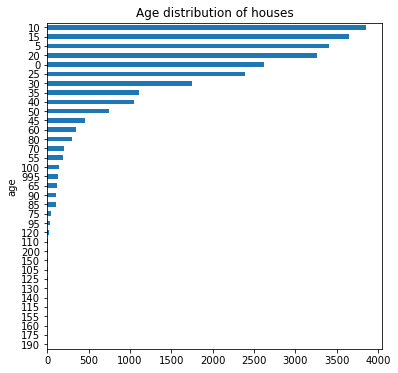

In [23]:
# Where are age?
train_values.groupby('age').building_id.count().\
    sort_values().\
    plot(kind='barh', figsize=(6,6))
plt.title('Age distribution of houses')
plt.show()

The younges count_floors_pre_eq for $1 and the oldest house for $9
The average age is $2, while median is $2


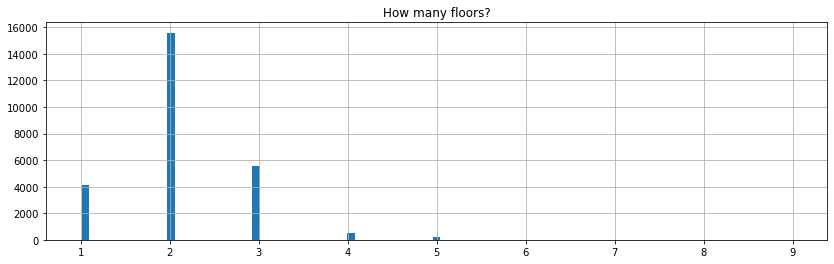

In [18]:
#print('The younges age for ${:,.0f} and the oldest house for ${:,.0f}'.format(
print('The younges count_floors_pre_eq for ${:} and the oldest house for ${:}'.format(
    train_values.count_floors_pre_eq.min(), train_values.count_floors_pre_eq.max()))
print('The average age is ${:,.0f}, while median is ${:,.0f}'.format(
    train_values.count_floors_pre_eq.mean(), train_values.count_floors_pre_eq.median()))
train_values.count_floors_pre_eq.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How many floors?')
plt.show()

---

In [21]:
#Baseline
train_labels['damage_grade'].value_counts(normalize=True)

2    0.567421
3    0.336109
1    0.096470
Name: damage_grade, dtype: float64

In [25]:
le = LabelEncoder()
train_enc = train_values.apply(le.fit_transform)
train_enc

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,19839,6,435,7525,1,6,5,3,2,2,...,0,0,0,0,0,0,0,0,0,0
1,678,8,802,1716,1,2,7,5,1,2,...,0,0,0,0,0,0,0,0,0,0
2,2320,21,322,5535,1,2,4,3,2,2,...,0,0,0,0,0,0,0,0,0,0
3,14550,22,370,6597,1,2,5,3,2,2,...,0,0,0,0,0,0,0,0,0,0
4,5002,11,115,928,2,6,7,7,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26055,347,20,1047,894,1,2,7,3,2,2,...,0,0,0,0,0,0,0,0,0,0
26056,5973,10,1268,7344,2,13,5,5,2,2,...,0,0,0,0,0,0,0,0,0,0
26057,24219,17,208,6169,2,5,7,5,2,2,...,0,0,0,0,0,0,0,0,0,0
26058,22449,21,41,3624,1,2,7,3,2,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#From Chris

#X = train_enc
#y = trainlabel['damage_grade']
#X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=123)
#pipe_forest = make_pipeline(StandardScaler(), DecisionTreeClassifier())
#params = {'decisiontreeclassifier__max_depth' : [2, 3, 4, 5]}
#grid_forest = GridSearchCV(pipe_forest, param_grid = params)
#grid_forest.fit(X_train,y_train)
#grid_forest.score(X_test,y_test) # I got 0.646815042210284
#grid_forest.best_estimator_

In [29]:
#TTS
X = train_enc
y = train_labels['damage_grade']
#X_train, X_test, y_train, y_test = train_test_split(train_enc,train_labels, random_state=123 )
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=123)

## Model

In [ ]:
#from Hackathon2 
#Cvect and logreg
#pipe = make_pipeline(CountVectorizer(stop_words = 'english'), LogisticRegression(n_jobs=-1))
#
#params = {'countvectorizer__max_features':[500, 1000, 15000, 2000, 2500]}
#
#grid=GridSearchCV(pipe, param_grid=params, n_jobs= -1)
#grid.fit(X_train, y_train)
#

### logreg

In [36]:
#Cvect and logreg
pipe = make_pipeline(StandardScaler(),LogisticRegression(n_jobs=-1))
#
#params = {'countvectorizer__max_features':[500, 1000, 15000, 2000, 2500]}
#
#grid=GridSearchCV(pipe, n_jobs= -1)
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.5838833461243285

In [38]:
pipe.fit(X_test, y_test)
pipe.score(X_test, y_test)

0.5829623944742901

In [37]:
pipe.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [48]:
#Source https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

# define dataset
X = train_enc
y = train_labels['damage_grade']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=123)

# define models and parameters
model = LogisticRegression()
#pipe = make_pipeline(StandardScaler(),LogisticRegression()) #added in instead of model above
#solvers = ['newton-cg', 'lbfgs', 'liblinear']  #original
solvers = ['lbfgs']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) #comment this out and the cv=cv in grid_search
grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           #cv=cv, 
                           scoring='accuracy',
                           error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.563315 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.560591 (0.002720) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.561051 (0.004098) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.560399 (0.000635) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.563315 (0.002123) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.559133 (0.003848) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


/Users/ericcheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
pipe_lgr = make_pipeline(StandardScaler(), LogisticRegression(n_jobs = -1, max_iter = 1000))
params = {'logisticregression__C' : [0.1, 0.75, 1, 10],
          'logisticregression__solver' : ['newton-cg', 'lbfgs', 'liblinear']}
grid_lgr = GridSearchCV(pipe_lgr, param_grid = params)
grid_lgr.fit(X_train, y_train)
print(f'Train Score: {grid_lgr.score(X_train, y_train)}')
print(f'Test Score: {grid_lgr.score(X_test, y_test)}')
grid_lgr.best_params_

/Users/ericcheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/ericcheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/ericcheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/ericcheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 

Train Score: 0.5838833461243285
Test Score: 0.5820414428242517


{'logisticregression__C': 10, 'logisticregression__solver': 'lbfgs'}

## Modeling KNN

In [60]:
# define models and parameters
#  model = KNeighborsClassifier()
#  n_neighbors = range(1, 21, 2)
#  weights = ['uniform', 'distance']
#  #metric = ['euclidean', 'manhattan', 'minkowski']
#  metric = ['euclidean']
#  # define grid search
#  grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
#  #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#  #grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
#  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
#  grid_result = grid_search.fit(X, y)
#  # summarize results
#  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#  means = grid_result.cv_results_['mean_test_score']
#  stds = grid_result.cv_results_['std_test_score']
#  params = grid_result.cv_results_['params']
#  for mean, stdev, param in zip(means, stds, params):
#      print("%f (%f) with: %r" % (mean, stdev, param))

In [64]:
#Basic KNN
X = train_enc
y = train_labels['damage_grade']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=123)

pipe_knn = make_pipeline(StandardScaler(),KNeighborsClassifier(n_jobs=-1))
pipe_knn.fit(X_train, y_train)
pipe_knn.score(X_train, y_train)
print(f'Train Score: {pipe_knn.score(X_train, y_train)}')
print(f'Test Score: {pipe_knn.score(X_test, y_test)}')

Train Score: 0.718495778971604
Test Score: 0.5711435149654643


In [150]:
X = train_enc
y = train_labels['damage_grade']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=123)

pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_jobs = -1))  

#params = {'logisticregression__C' : [0.1, 0.75, 1, 10],
#          'logisticregression__solver' : ['newton-cg', 'lbfgs', 'liblinear']}
#grid_lgr = GridSearchCV(pipe_lgr, param_grid = params)


#List Hyperparameters that we want to tune.
#leaf_size = list(range(1,50))
#n_neighbors = list(range(1,30))
#p=[1,2]
#Convert to dictionary
#params = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#params = dict(n_neighbors=n_neighbors, p=p)

#define parameters for hypertuning
params = {
            'n_neighbors': [5, 7, 9, 11],
#            'leaf_size': (1,30),
#            'p': (1,2)
       }
#Run Gridsearch    
#grid_knn = GridSearchCV(pipe_knn, param_grid = params)

grid_knn = GridSearchCV(pipe_knn, param_grid=params)
grid_knn.fit(X_train, y_train)
print(f'Train Score: {grid_knn.score(X_train, y_train)}')
print(f'Test Score: {grid_knn.score(X_test, y_test)}')
grid_knn.best_params_

ValueError: Invalid parameter n_neighbors for estimator Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_jobs=-1))]). Check the list of available parameters with `estimator.get_params().keys()`.

### Trying Veronica's code - KNN testing


In [151]:
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_jobs = -1))

# n_neighbors must be odd to avoid an even split
#params = {'kneighborsclassifier__n_neighbors' : [5, 7, 9, 11]}
params = {'n_neighbors' : [5, 7, 9, 11]}

grid_knn = GridSearchCV(pipe_knn, param_grid = params)
grid_knn.fit(X_train, y_train)
print(f'Train Score: {grid_knn.score(X_train, y_train)}')
print(f'Test Score: {grid_knn.score(X_test, y_test)}')
grid_knn.best_params_

ValueError: Invalid parameter n_neighbors for estimator Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_jobs=-1))]). Check the list of available parameters with `estimator.get_params().keys()`.

### 5/13 per Jacob, use OHE instead of LabelEncoding

#### LOG with OHE


In [98]:
X = train_values
y = train_labels['damage_grade']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=123)

---

In [142]:
#Cvect and logreg

#define X and y
X = train_values
y = train_labels['damage_grade']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=123)

#Create pipeline
pipe = make_pipeline(OneHotEncoder(),StandardScaler(with_mean=False), LogisticRegression(n_jobs=-1))

params = {'logisticregression__C' : [0.1, 0.75, 1, 10],
          #'logisticregression__solver' : ['newton-cg', 'lbfgs', 'liblinear']
         }
grid_lgr = GridSearchCV(pipe, param_grid = params)


grid_lgr.fit(X_train, y_train)
grid_lgr.score(X_test, y_test)
print(f'Train Score: {grid_lgr.score(X_train, y_train)}')
print(f'Test Score: {grid_lgr.score(X_test, y_test)}')

Train Score: 0.5925300588385777
Test Score: 0.585111281657713


pandas.core.frame.DataFrame

#### KNN with OHE


In [161]:
#train_values = train_values.head(int(len(train_values) * 0.1))
#train_labels = train_labels.head(int(len(train_labels) * 0.1))
X = train_values
y = train_labels['damage_grade']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=123)

pipe_knn = make_pipeline(OneHotEncoder(),StandardScaler(), KNeighborsClassifier(n_jobs = -1))

# n_neighbors must be odd to avoid an even split
params = {'kneighborsclassifier__n_neighbors' : [5, 7, 9, 11]}
        #'kneighborsclassifier__leaf_size': [1,5,10,30]}


#define parameters for hypertuning
#params = {
#            'n_neighbors': [5, 7, 9, 11],
#            'leaf_size': (1,30),
#            'p': (1,2)

grid_knn = GridSearchCV(pipe_knn, param_grid = params)
grid_knn.fit(X_train, y_train)
print(f'Train Score: {grid_knn.score(X_train, y_train)}')
print(f'Test Score: {grid_knn.score(X_test, y_test)}')
grid_knn.best_params_

Train Score: 0.6720900486057815
Test Score: 0.575287797390637


{'kneighborsclassifier__n_neighbors': 9}

---

In [ ]:
#https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

In [ ]:
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
                   
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5